In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Function for legible graphs (set dimensions and increase label font sizes)
def legible_graph(x, y):
    sns.set(rc={'figure.figsize':(x, y)})
    plt.rc('axes', titlesize=24) # Fontsize of title
    plt.rc('axes', labelsize=20) # Fontsize of x and y labels
    plt.rc('xtick', labelsize=16) # Fontsize of tick labels
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=14)
    
# Function to label title and axes, and to specify if want logx or logy scale
def set_labels(title, xlabel, ylabel, logx=False, logy=False):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logx:
        plt.xscale('log')
    if logy:
        plt.yscale('log')
    plt.tight_layout()

# Initial data processing
- Extracted countries of interest
- Transposed dataframe

In [3]:
# Load confirmed cases and deaths data
cases = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

# Examine general format
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8


In [4]:
# List of countries of interest
countries = ['US', 'China', 'Italy', 'Korea, South']

# Select only countries of interest
cases = cases[cases['Country/Region'].isin(countries)]
deaths = deaths[deaths['Country/Region'].isin(countries)]

cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,561,566,569,573,577,577,580,580,582,584
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,578,578,578,578,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,322,328,331,337,338,340,343,345,345,349
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,136,136,136,136,138,138,138,138,138,138


In [5]:
# Combine China's data together
china_cases = cases[cases['Country/Region']=='China'].sum(axis=0)
china_deaths = deaths[deaths['Country/Region']=='China'].sum(axis=0)

# Fix string columns
china_cases['Province/State'] = np.NaN
china_cases['Country/Region'] = 'China'
china_deaths['Province/State'] = np.NaN
china_deaths['Country/Region'] = 'China'

# Dataframe of other countries with China readded and dropping unused columns
cases = cases[cases['Country/Region']!='China'].append(china_cases, ignore_index=True) \
                                               .drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths = deaths[deaths['Country/Region']!='China'].append(china_deaths, ignore_index=True) \
                                               .drop(['Province/State', 'Lat', 'Long'], axis=1)

# Transpose the dataframes
cases_transposed = cases.set_index('Country/Region').transpose()
deaths_transposed = deaths.set_index('Country/Region').transpose()

# Reorder columns of dataframe to match order of countries list
cases_transposed = cases_transposed[countries]
deaths_transposed = deaths_transposed[countries]

# Remove column index name
del cases_transposed.columns.name
del deaths_transposed.columns.name

In [6]:
cases_transposed.to_csv(r'time_series_covid19_confirmed_selected.csv')
cases_transposed.head()

,US,China,Italy,"Korea, South"
1/22/20,1,548,0,1
1/23/20,1,643,0,1
1/24/20,2,920,0,2
1/25/20,2,1406,0,2
1/26/20,5,2075,0,3


In [7]:
deaths_transposed.to_csv(r'time_series_covid19_deaths_selected.csv')
deaths_transposed.head()

,US,China,Italy,"Korea, South"
1/22/20,0,17,0,0
1/23/20,0,18,0,0
1/24/20,0,26,0,0
1/25/20,0,42,0,0
1/26/20,0,56,0,0


# Initial exploratory data analysis
- Cases and deaths over time on linear scale
- Cases and deaths over time on log scale

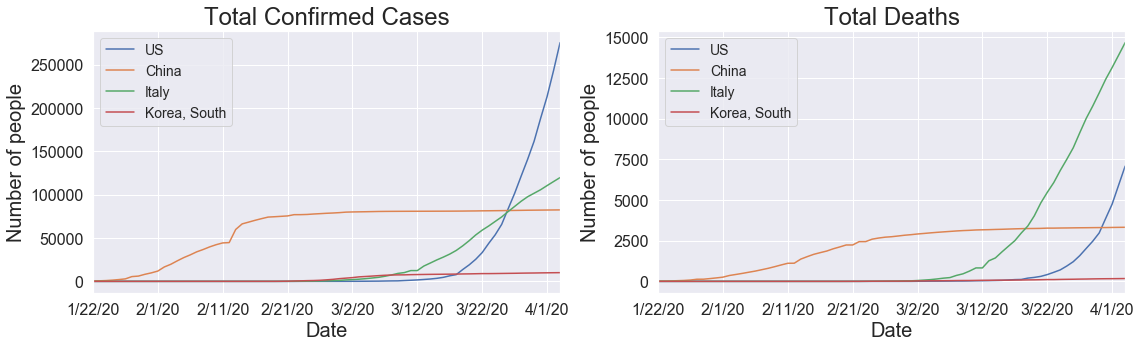

In [8]:
# Figure settings
legible_graph(16, 5)

# Plot total cases and deaths over time on linear scale
plt.subplot(1, 2, 1)
cases_transposed.plot(ax=plt.gca())
set_labels('Total Confirmed Cases', 'Date', 'Number of people')

plt.subplot(1, 2, 2)
deaths_transposed.plot(ax=plt.gca())
set_labels('Total Deaths', 'Date', 'Number of people')

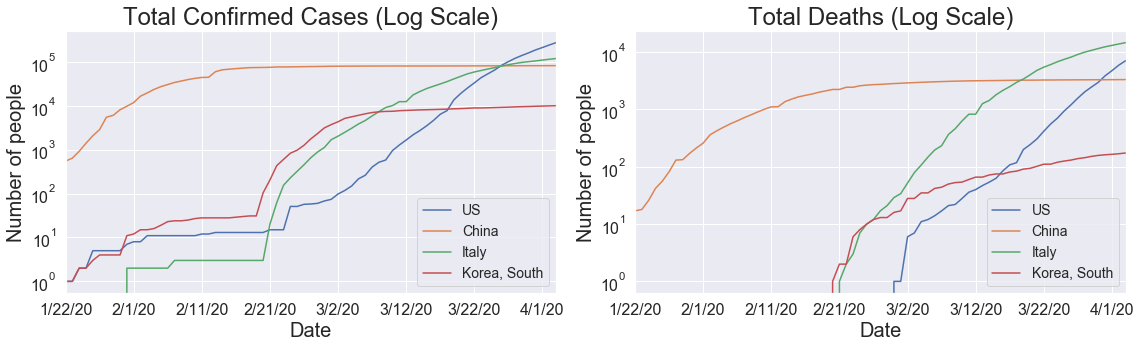

In [9]:
# Figure settings
legible_graph(16, 5)

# Plot total cases and deaths over time on logy scale
plt.subplot(1, 2, 1)
cases_transposed.plot(logy=True, ax=plt.gca())
set_labels('Total Confirmed Cases (Log Scale)', 'Date', 'Number of people')

plt.subplot(1, 2, 2)
deaths_transposed.plot(logy=True, ax=plt.gca())
set_labels('Total Deaths (Log Scale)', 'Date', 'Number of people')

# Plots with x-axis set to days since 100 cases
- Total cases and deaths over time on linear scale with x-axis shifted to day of 100 cases
- Same graphs on log scale
- **Caveat**: First data point for China is already at 548 cases, 17 deaths, so China's data should likely be shifted around 5 to 7 days to the right (time for 100 cases to increase to 500 cases)
- Dates for 100 cases: China: 1/22/20, South Korea: 2/20/20, Italy: 2/23/20, Spain: 3/2/20, US: 3/3/20

In [10]:
# Find date for 100 confirmed cases
# countries = ['US', 'China', 'Iran', 'Italy'] (specified before)
index_100 = []
date_100 = []

# Reset index, which will be used as proxy for day
deaths_reset = deaths_transposed.reset_index().rename(columns={'index':'Date'})
cases_reset = cases_transposed.reset_index().rename(columns={'index':'Date'})

# Find first date where number of cases is 100 or more
for country in countries:
    index = deaths_reset[cases_reset[country]>=100].index[0]
    index_100.append(index)
    date_100.append(deaths_reset.iloc[index]['Date'])

# Show the date for 100 cases for each country
print([countries[i] + ': ' + date_100[i] for i in range(len(countries))])

# Note: Europe travel ban on 3/10, so at least 7 days since restrictions placed

['US: 3/3/20', 'China: 1/22/20', 'Italy: 2/23/20', 'Korea, South: 2/20/20']


In [11]:
index_100

[41, 0, 32, 29]

In [12]:
# New dataframes for data shifted to new index
cases_shifted = cases_reset.reset_index()
cases_shifted = cases_shifted[['index']]
deaths_shifted = deaths_reset.reset_index()
deaths_shifted = deaths_shifted[['index']]

for i in range(len(countries)):
    # Temporary dataframe with all indices shifted
    temp = cases_reset[countries[i]].shift(-index_100[i])
    temp2 = deaths_reset[countries[i]].shift(-index_100[i])
    
    # Join the dataframes
    cases_shifted = cases_shifted.join(temp, how='inner')
    deaths_shifted = deaths_shifted.join(temp2, how='inner')

cases_shifted = cases_shifted.drop('index', axis=1)
deaths_shifted = deaths_shifted.drop('index', axis=1)
deaths_shifted.head()

,US,China,Italy,"Korea, South"
0,7.0,17,3.0,1.0
1,11.0,18,7.0,2.0
2,12.0,26,10.0,2.0
3,14.0,42,12.0,6.0
4,17.0,56,17.0,8.0


Text(0, 0.5, 'Number of people')

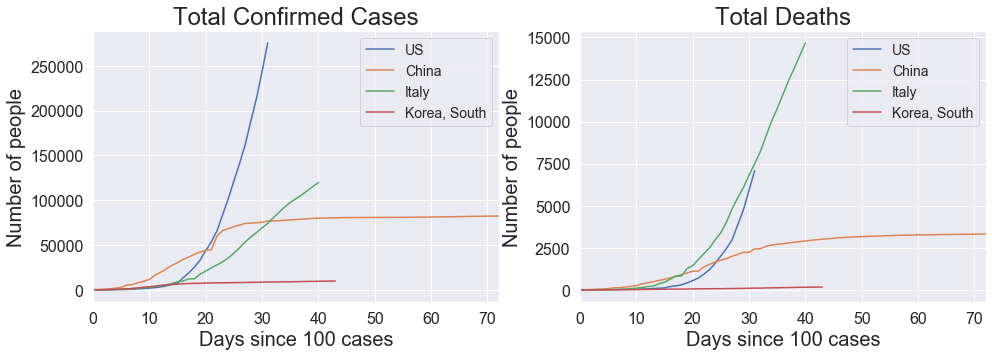

In [13]:
# Figure settings
legible_graph(16, 5)

# Plot total cases and deaths over time on linear scale
plt.subplot(1, 2, 1)
cases_shifted.plot(ax=plt.gca())
plt.title('Total Confirmed Cases')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

plt.subplot(1, 2, 2)
deaths_shifted.plot(ax=plt.gca())
plt.title('Total Deaths')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of people')

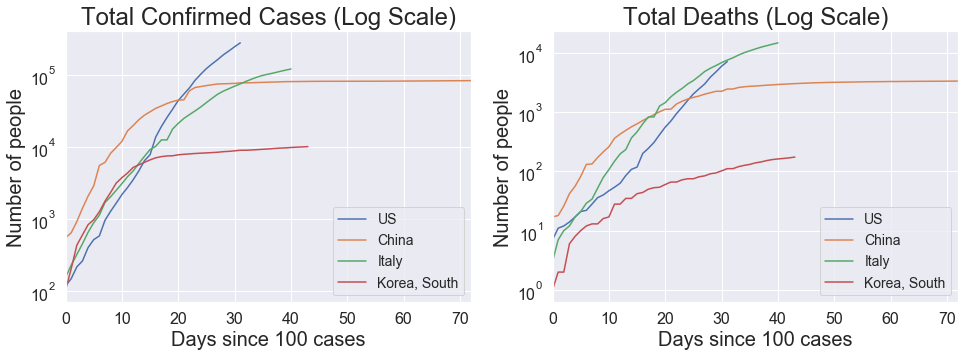

In [14]:
# Figure settings
legible_graph(16, 5)

# Plot total cases and deaths over time on logy scale
plt.subplot(1, 2, 1)
cases_shifted.plot(logy=True, ax=plt.gca())
plt.title('Total Confirmed Cases (Log Scale)')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

plt.subplot(1, 2, 2)
deaths_shifted.plot(logy=True, ax=plt.gca())
plt.title('Total Deaths (Log Scale)')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

# What about cases and deaths per day?
- Daily cases and deaths over time on log scales
- Daily cases and deaths with a 7-day moving average

In [15]:
# Calculate deaths per day by calculating difference with previous row
daily_cases = cases_reset.drop('Date', axis=1).diff()
daily_deaths = deaths_reset.drop('Date', axis=1).diff()

# New dataframes for daily data (with x-axis shifted to days since 100 cases)
daily_cases_shifted = daily_cases.reset_index()
daily_cases_shifted = daily_cases_shifted[['index']]
daily_deaths_shifted = daily_deaths.reset_index()
daily_deaths_shifted = daily_deaths_shifted[['index']]

for i in range(len(countries)):
    # Temporary dataframe with all indices shifted
    temp = daily_cases[countries[i]].shift(-index_100[i])
    temp2 = daily_deaths[countries[i]].shift(-index_100[i])
    
    # Join the dataframes
    daily_cases_shifted = daily_cases_shifted.join(temp, how='inner')
    daily_deaths_shifted = daily_deaths_shifted.join(temp2, how='inner')

daily_cases_shifted = daily_cases_shifted.drop('index', axis=1)
daily_deaths_shifted = daily_deaths_shifted.drop('index', axis=1)
daily_deaths_shifted.head()

,US,China,Italy,"Korea, South"
0,1.0,NaN,1.0,1.0
1,4.0,1.0,4.0,1.0
2,1.0,8.0,3.0,0.0
3,2.0,16.0,2.0,4.0
4,3.0,14.0,5.0,2.0


Text(0, 0.5, 'Number of people')

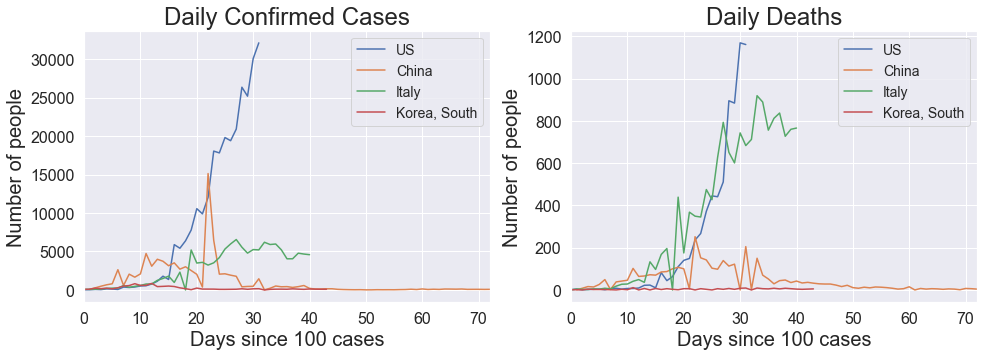

In [16]:
# Figure settings
legible_graph(16, 5)

# Plot daily cases and deaths over time on linear scale
plt.subplot(1, 2, 1)
daily_cases_shifted.plot(ax=plt.gca())
plt.title('Daily Confirmed Cases')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

plt.subplot(1, 2, 2)
daily_deaths_shifted.plot(ax=plt.gca())
plt.title('Daily Deaths')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of people')

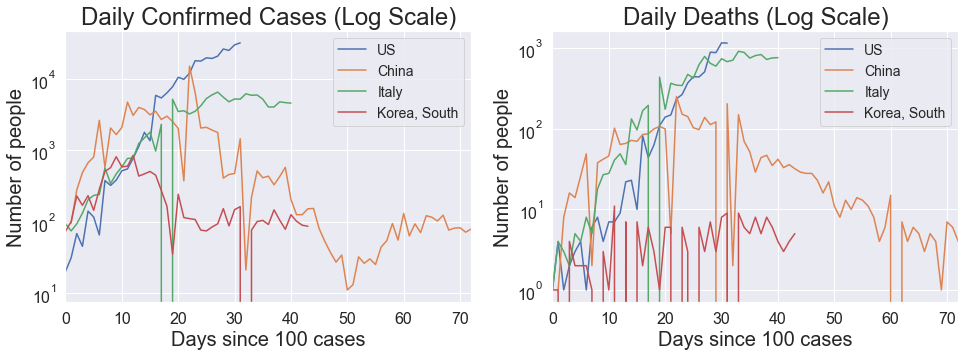

In [17]:
# Figure settings
legible_graph(16, 5)

# Plot daily cases and deaths over time on log scale
plt.subplot(1, 2, 1)
daily_cases_shifted.plot(logy=True, ax=plt.gca())
plt.title('Daily Confirmed Cases (Log Scale)')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

plt.subplot(1, 2, 2)
daily_deaths_shifted.plot(logy=True, ax=plt.gca())
plt.title('Daily Deaths (Log Scale)')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of people')

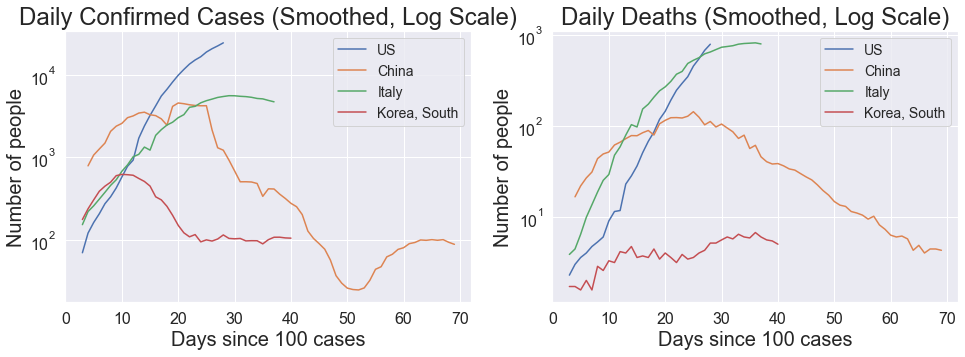

In [18]:
# Smooth out data with moving average
n_days = 7
smoothed_daily_cases = daily_cases_shifted.rolling(n_days, center=True).mean()
smoothed_daily_deaths = daily_deaths_shifted.rolling(n_days, center=True).mean()

# Figure settings
legible_graph(16, 5)

# Plot smoothed daily cases and deaths over time on logy scale
plt.subplot(1, 2, 1)
smoothed_daily_cases.plot(logy=True, ax=plt.gca())
plt.title('Daily Confirmed Cases (Smoothed, Log Scale)')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

plt.subplot(1, 2, 2)
smoothed_daily_deaths.plot(logy=True, ax=plt.gca())
plt.title('Daily Deaths (Smoothed, Log Scale)')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

# What about change in daily cases and deaths per day?
- Change in daily cases and deaths over time on log scales with a 7-day moving average

Text(0, 0.5, 'Number of people')

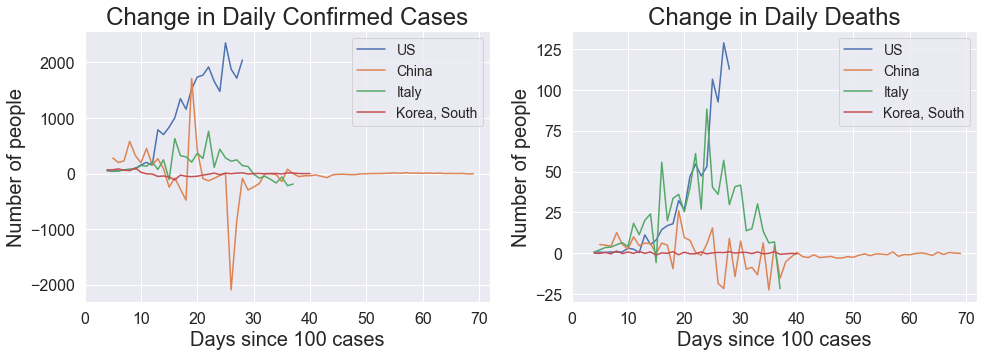

In [19]:
# Calculate change in deaths per day by calculating difference with previous row
delta_daily_cases = smoothed_daily_cases.diff()
delta_daily_deaths = smoothed_daily_deaths.diff()

# Figure settings
legible_graph(16, 5)

# Plot change in daily cases and deaths over time on linear scale
plt.subplot(1, 2, 1)
delta_daily_cases.plot(ax=plt.gca())
plt.title('Change in Daily Confirmed Cases')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

plt.subplot(1, 2, 2)
delta_daily_deaths.plot(ax=plt.gca())
plt.title('Change in Daily Deaths')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of people')

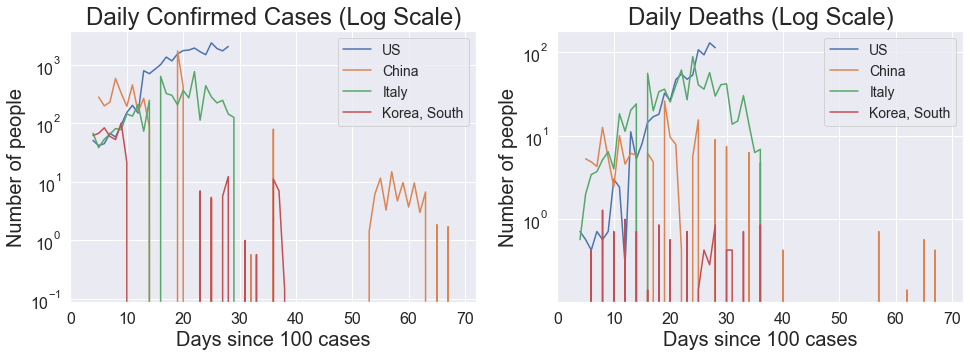

In [20]:
# Figure settings
legible_graph(16, 5)

# Plot change in daily cases and deaths over time on log scale
plt.subplot(1, 2, 1)
delta_daily_cases.plot(logy=True, ax=plt.gca())
plt.title('Daily Confirmed Cases (Log Scale)')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

plt.subplot(1, 2, 2)
delta_daily_deaths.plot(logy=True, ax=plt.gca())
plt.title('Daily Deaths (Log Scale)')
plt.xlabel('Days since 100 cases')
plt.ylabel('Number of people')

# Another method to visualize trajectory
- New confirmed cases and deaths in past week vs. total confirmed cases and deaths on log scale
- Based on: https://aatishb.com/covidtrends

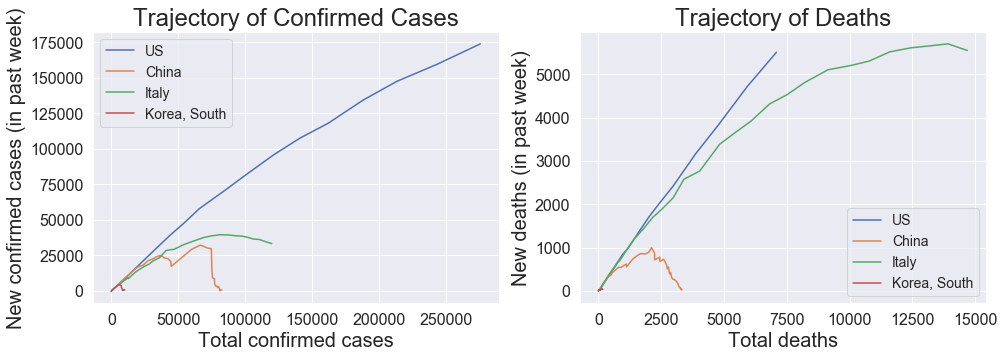

In [21]:
# Reset index and remove 'Date' column
deaths_no_date = deaths_transposed.reset_index(drop=True)
cases_no_date = cases_transposed.reset_index(drop=True)

# Take difference in cumulative total between each day and 7 days prior
deaths_week_total = deaths_no_date - deaths_no_date.shift(7)
cases_week_total = cases_no_date - cases_no_date.shift(7)

# Plot new confirmed cases and deaths in past week vs. total confirmed cases and deaths on linear scale
plt.subplot(1, 2, 1)
plt.plot(cases_no_date, cases_week_total)
plt.title('Trajectory of Confirmed Cases')
plt.xlabel('Total confirmed cases')
plt.ylabel('New confirmed cases (in past week)')
plt.legend(cases_no_date.columns)

plt.subplot(1, 2, 2)
plt.plot(deaths_no_date, deaths_week_total)
plt.title('Trajectory of Deaths')
plt.xlabel('Total deaths')
plt.ylabel('New deaths (in past week)')
plt.legend(cases_no_date.columns)

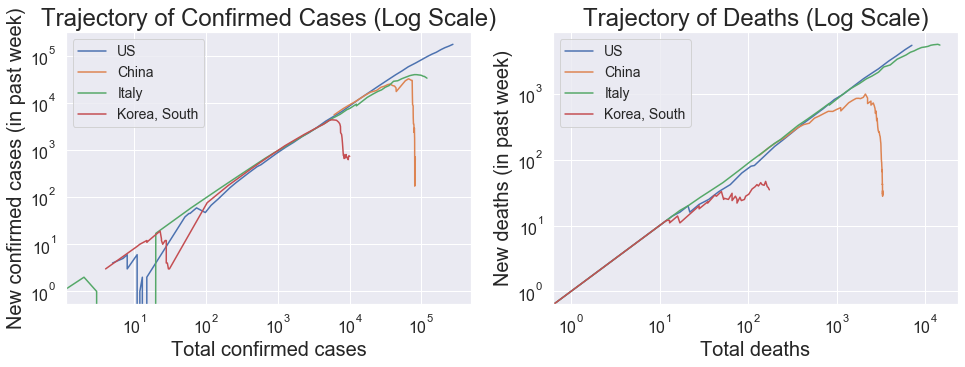

In [22]:
# Plot new confirmed cases and deaths in past week vs. total confirmed cases and deaths on log scale
plt.subplot(1, 2, 1)
plt.plot(cases_no_date, cases_week_total)
plt.title('Trajectory of Confirmed Cases (Log Scale)')
plt.xlabel('Total confirmed cases')
plt.ylabel('New confirmed cases (in past week)')
plt.legend(cases_no_date.columns)
plt.xscale('log')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(deaths_no_date, deaths_week_total)
plt.title('Trajectory of Deaths (Log Scale)')
plt.xlabel('Total deaths')
plt.ylabel('New deaths (in past week)')
plt.legend(cases_no_date.columns)
plt.xscale('log')
plt.yscale('log')